<a href="https://colab.research.google.com/github/DavidPolot/cap-comp215/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##David Polotsky
2nd Project, cellular automation of the spread of COVID

can we use cellular automation to visualize and generalize the spread of a virus like COVID

In [84]:

%matplotlib inline


import math
import time
from dataclasses import dataclass

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.signal import correlate2d

# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

In [89]:
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY = 0.02  # Probability of death
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

def initialize_grid():
    return np.zeros((GRID_SIZE, GRID_SIZE))

def randomly_infect(grid):
    """infect a random cell in the grid"""

    xs = np.random.choice(range(GRID_SIZE), size=INITIAL_INFECTED, replace=False)
    ys = np.random.choice(range(GRID_SIZE), size=INITIAL_INFECTED, replace=False)
    grid[xs,ys] = INFECTED

    return grid

g = initialize_grid()
randomly_infect(g)
assert np.sum(g) == INITIAL_INFECTED


In [90]:
# this is the working code, (ish) i just want to animate on one window but it seems like nothing i do works
#this code was writeen by the support of chatgpt, understood and clarified by me.

# Define neighborhood kernel
Neighborhood = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])

def update_grid(grid):
    # Define the rules of the grid
    grid = g
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if g[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in Neighborhood: #these are the differences of the x and y values
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE and grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                        g[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    g[i, j] = DEAD if np.random.rand() < MORTALITY else RECOVERED
    return g

print(update_grid(g))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [91]:
def update_grid(grid):
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in Neighborhood: #difference of x and y
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE and grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                        new_grid[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    new_grid[i, j] = DEAD if np.random.rand() < MORTALITY else RECOVERED
    return new_grid

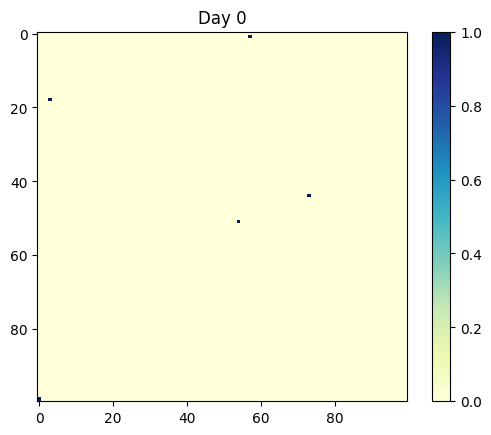

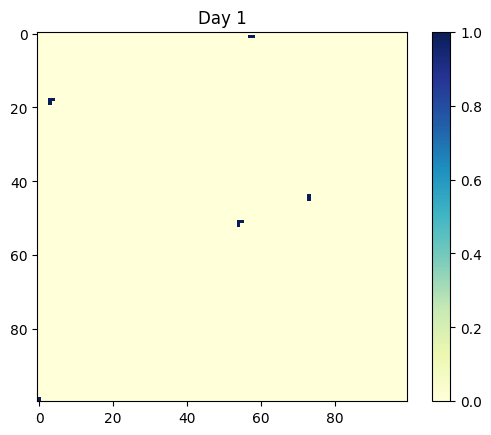

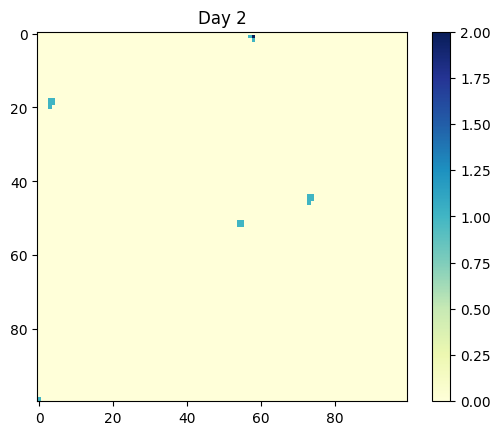

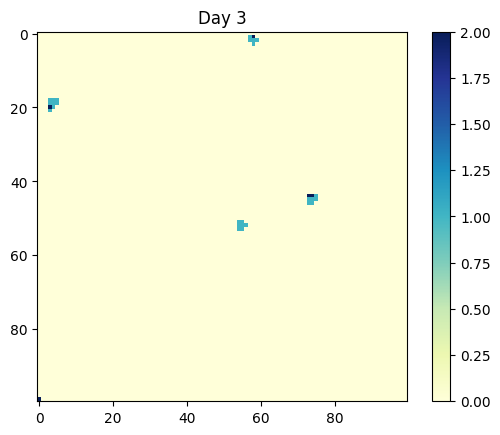

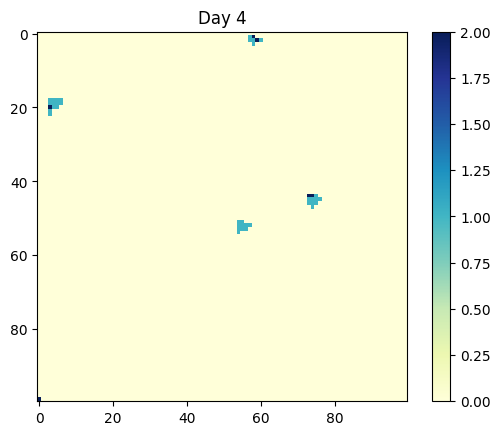

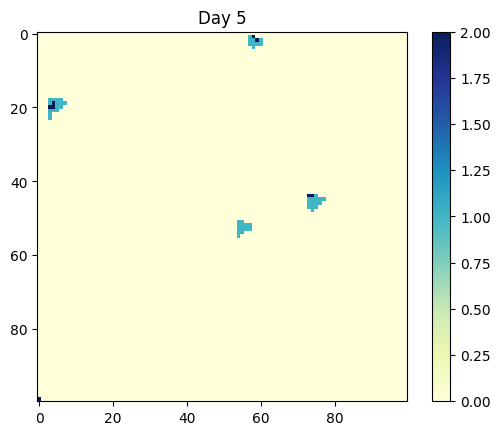

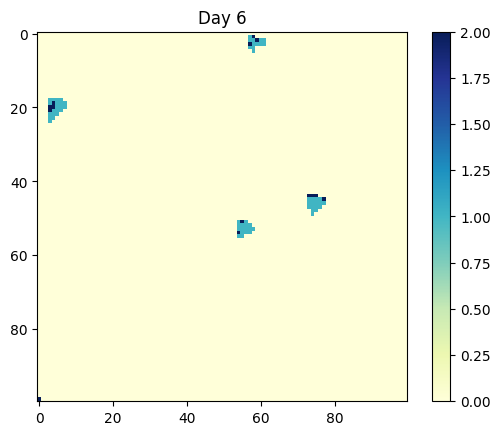

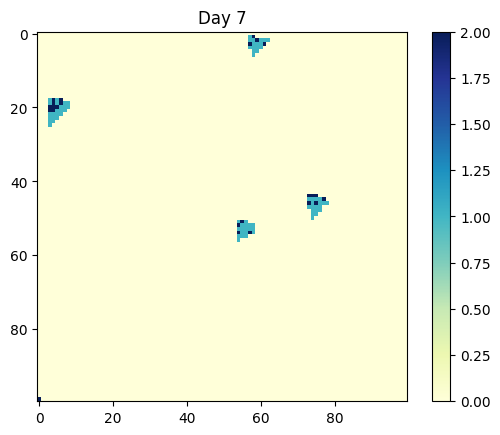

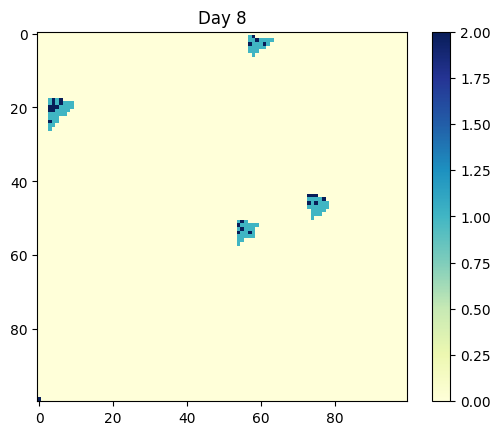

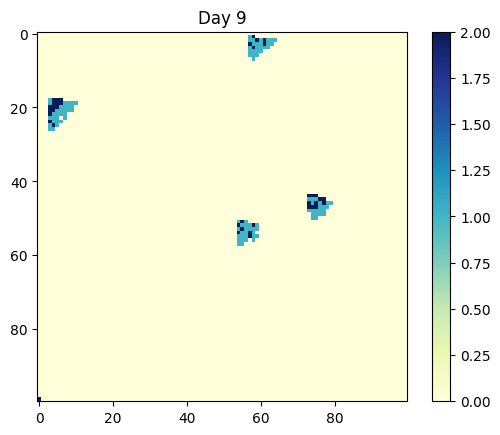

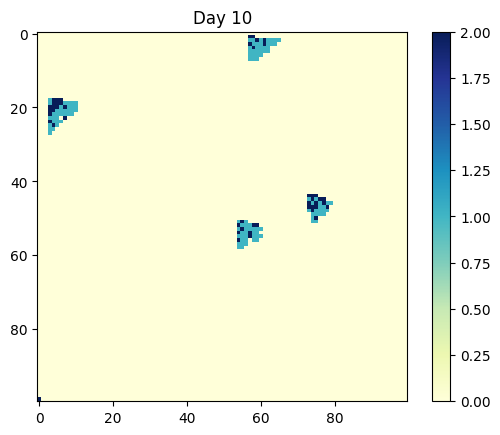

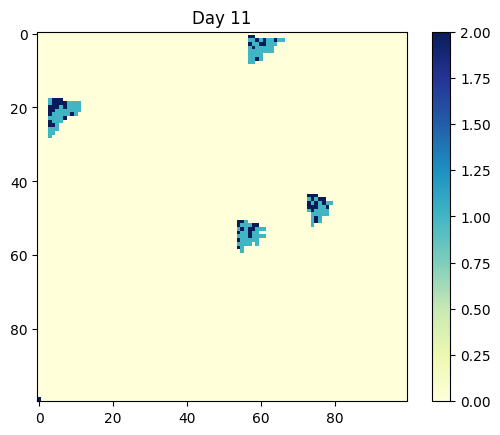

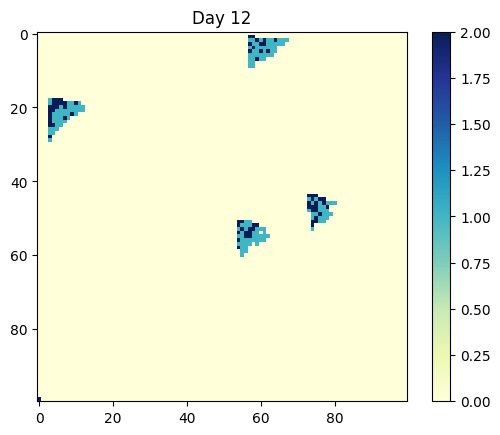

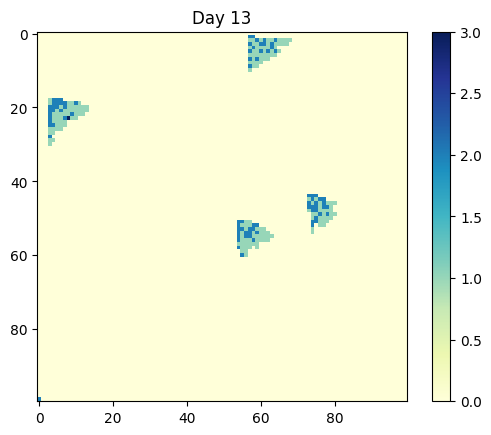

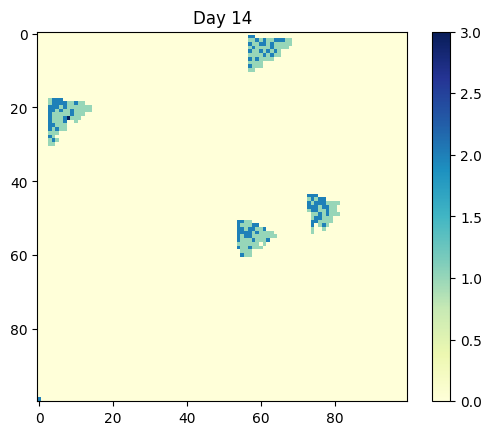

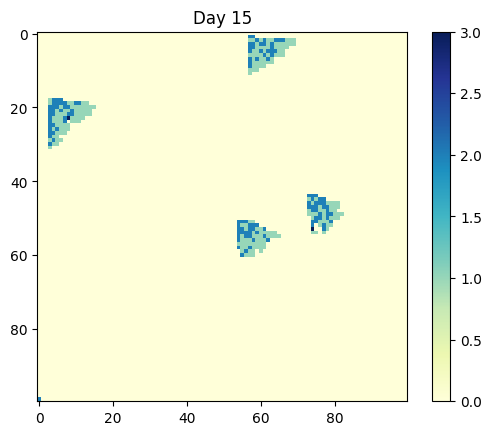

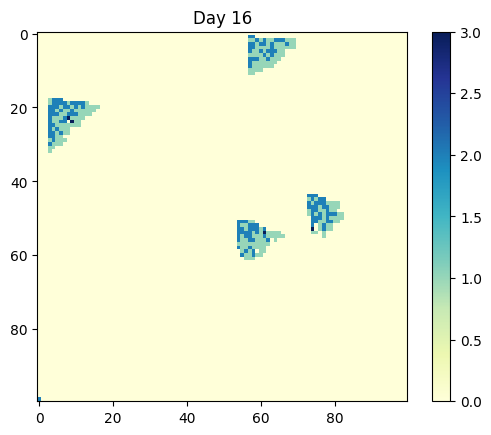

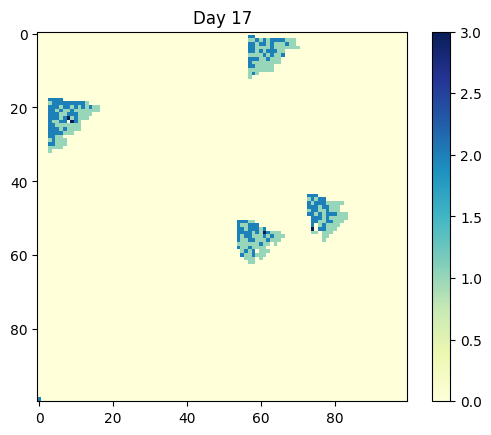

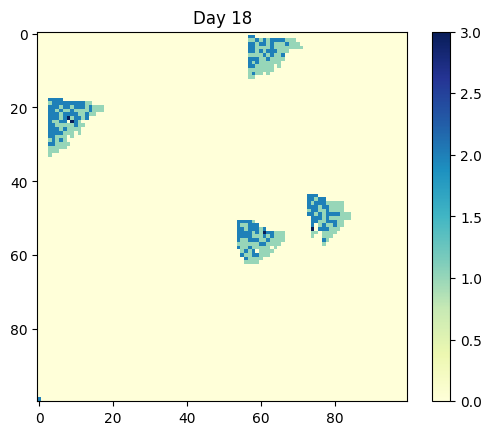

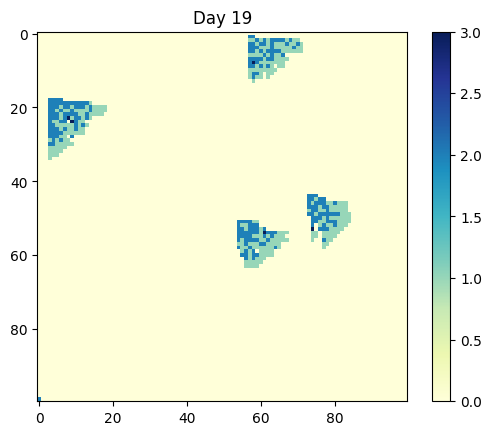

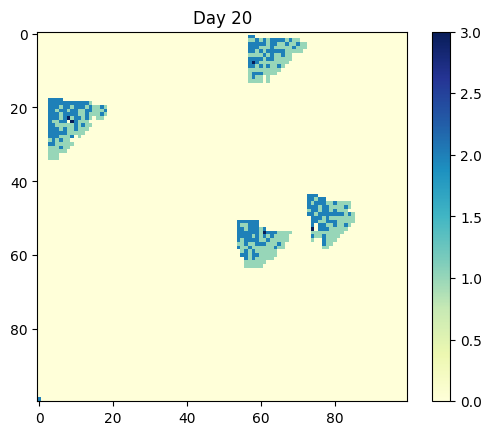

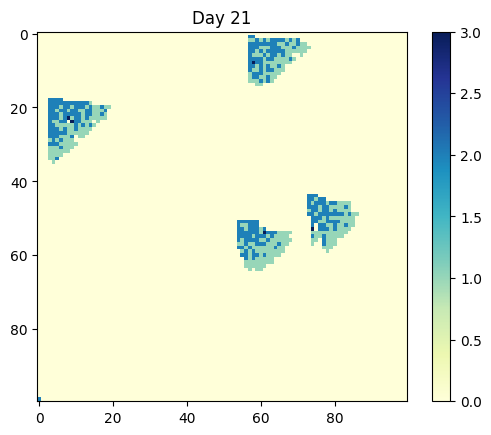

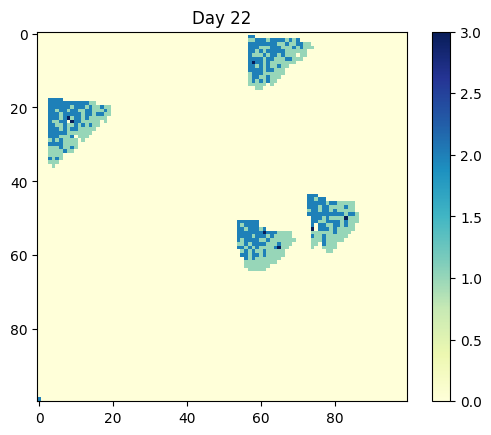

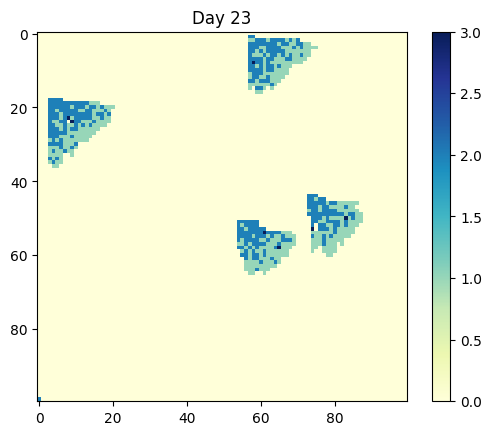

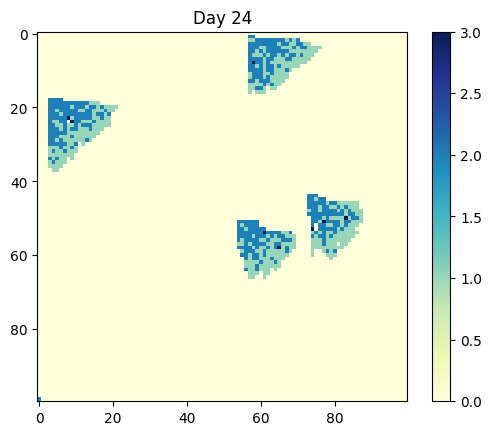

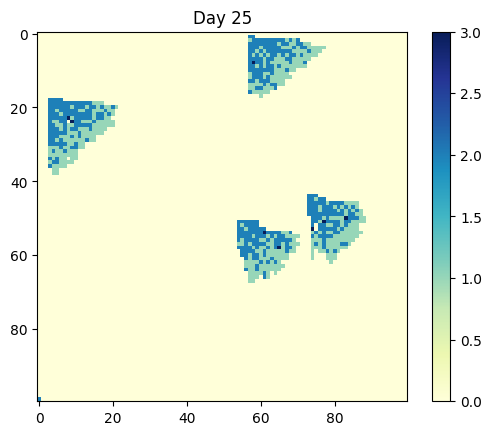

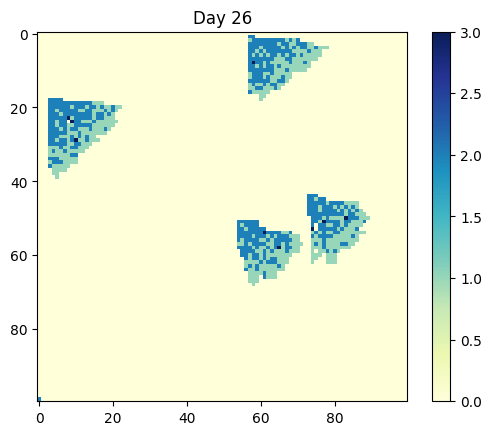

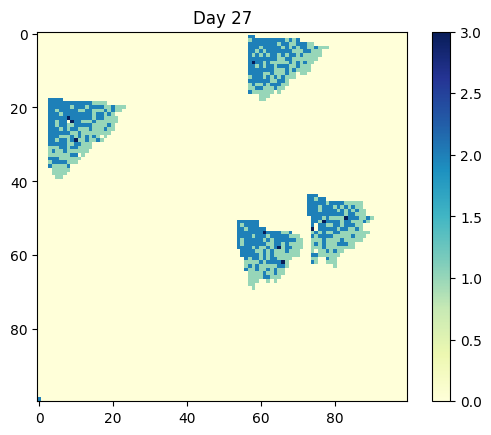

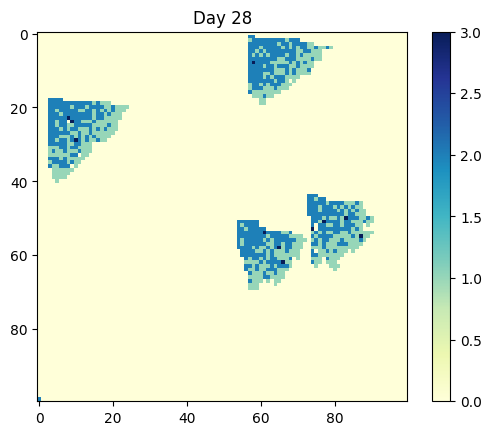

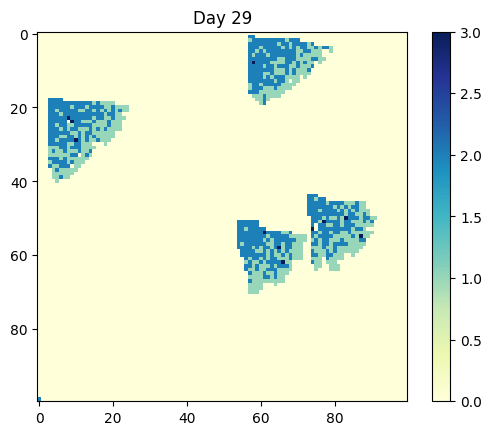

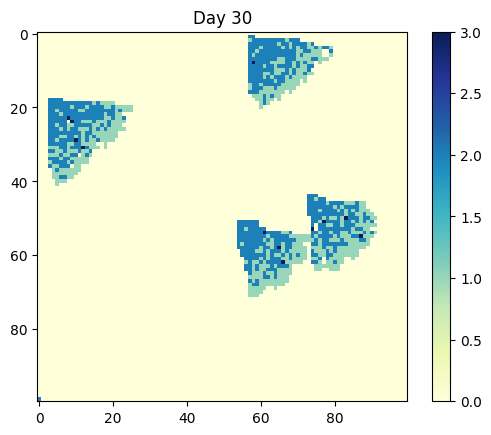

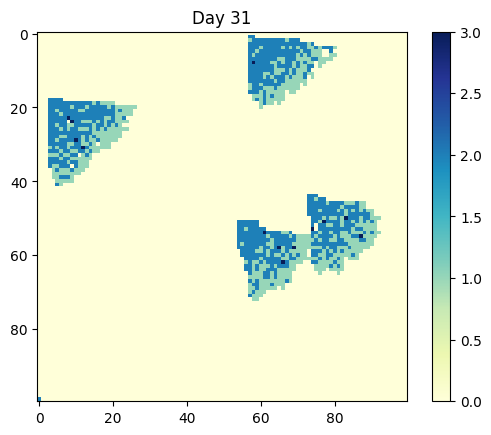

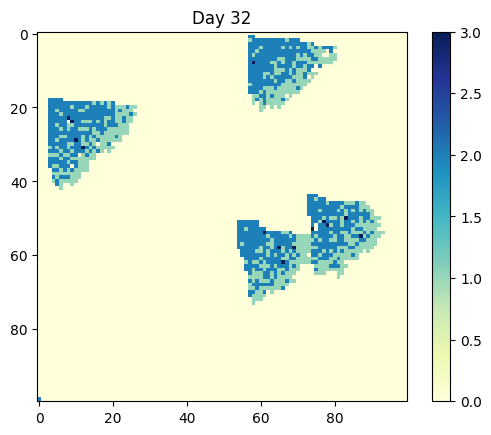

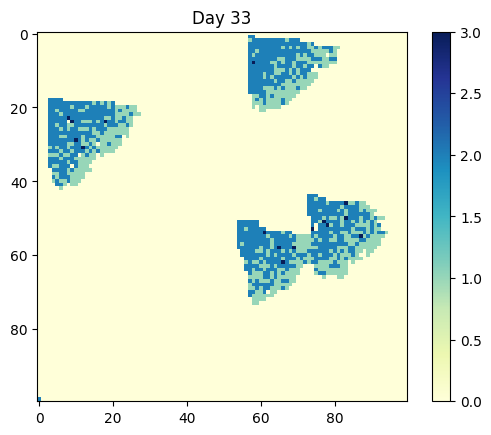

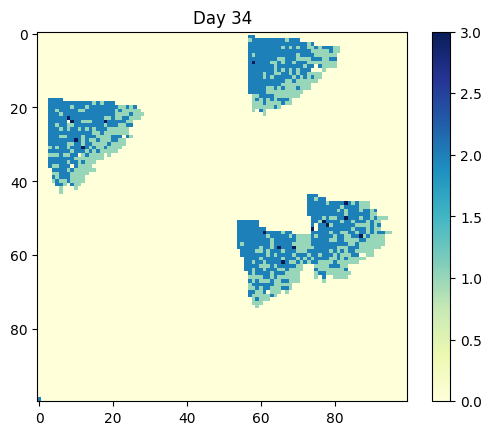

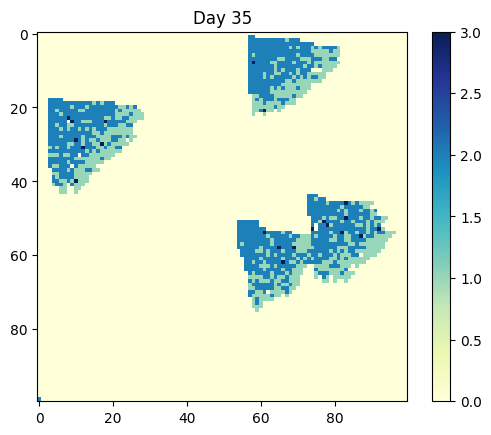

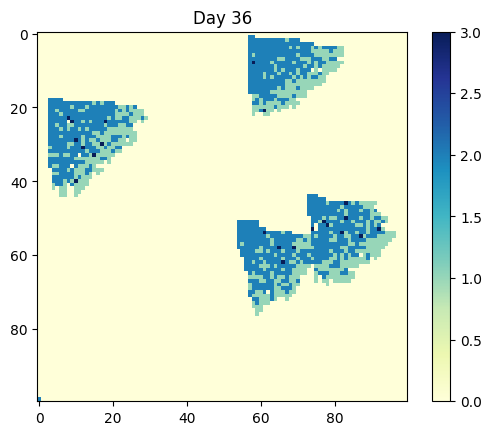

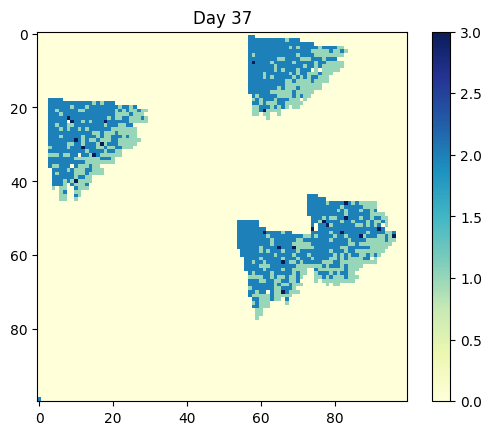

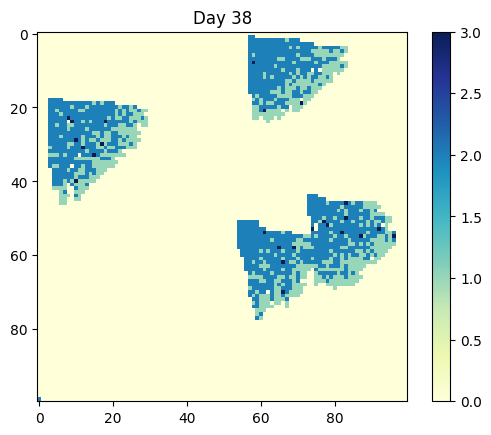

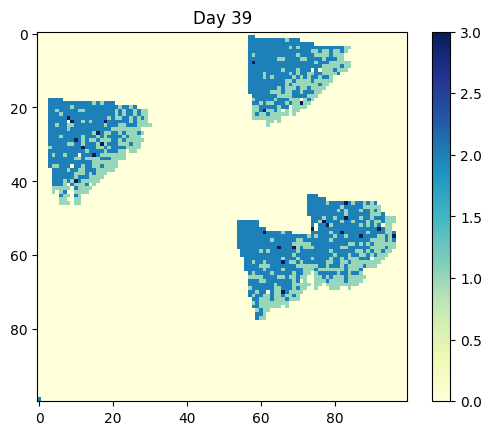

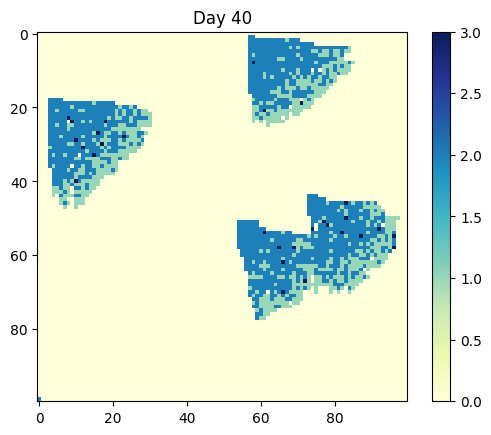

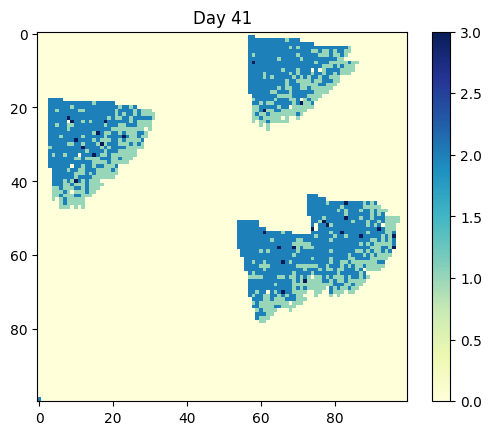

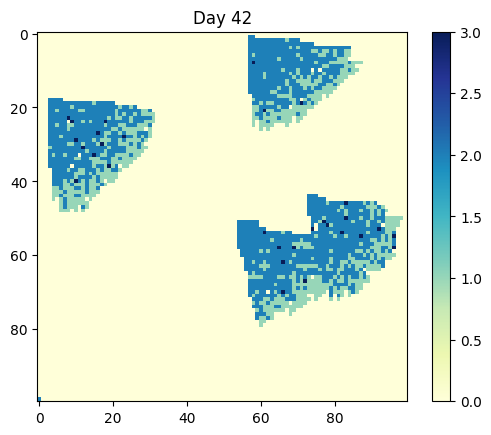

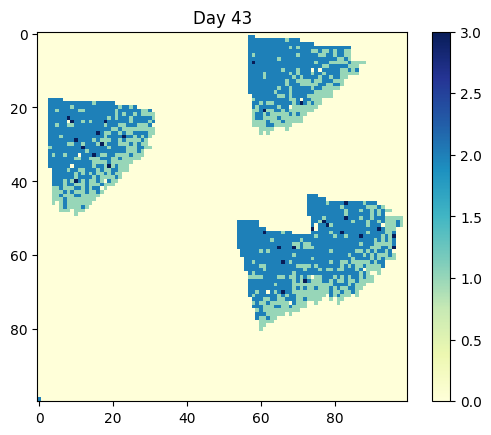

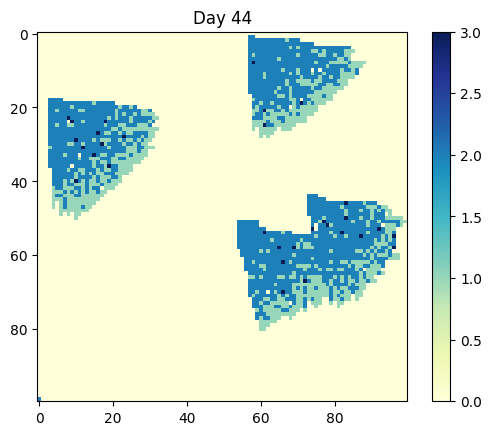

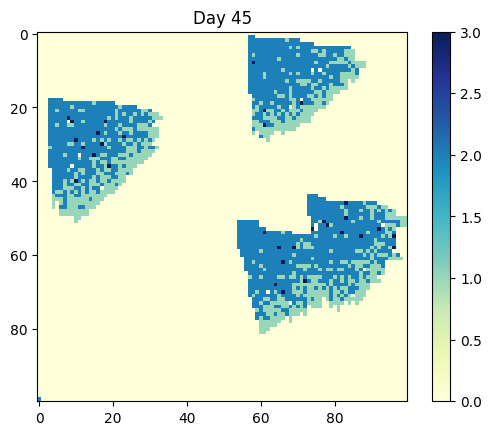

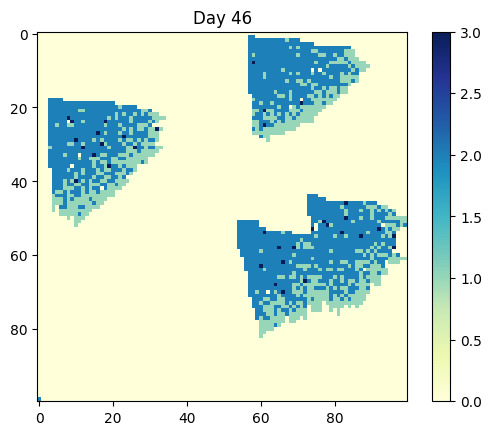

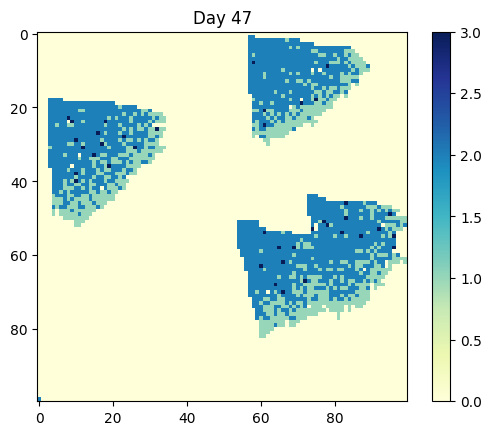

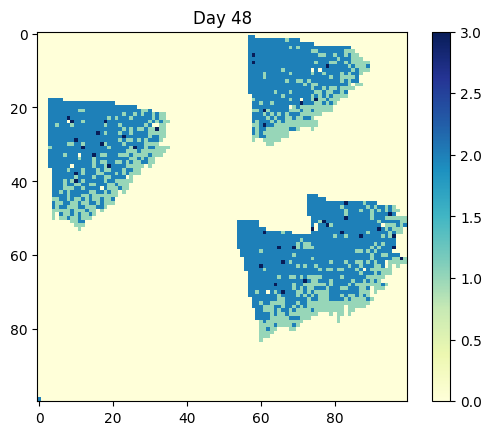

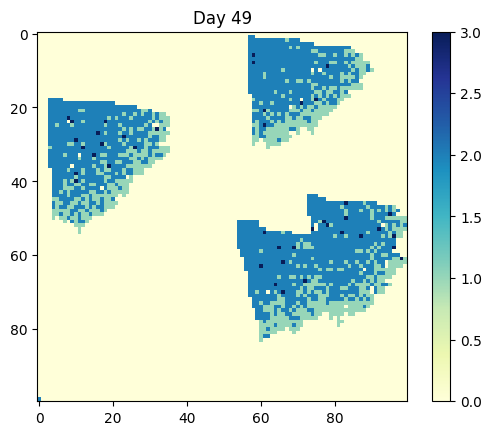

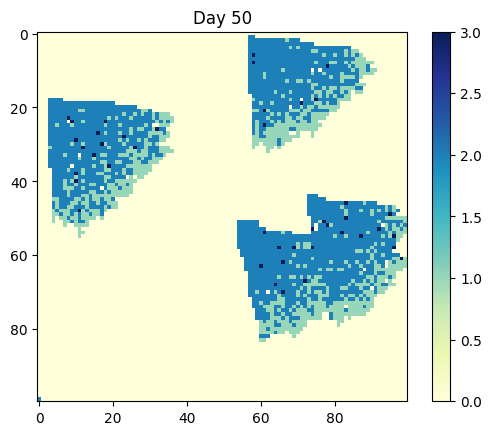

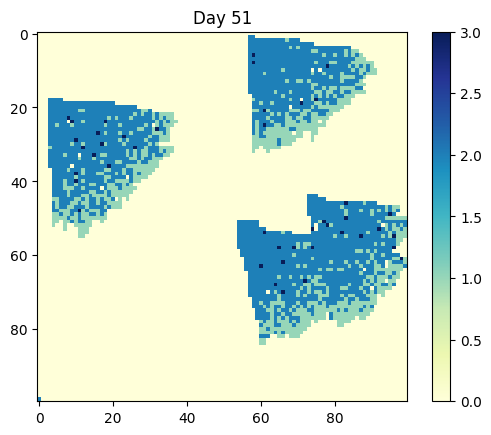

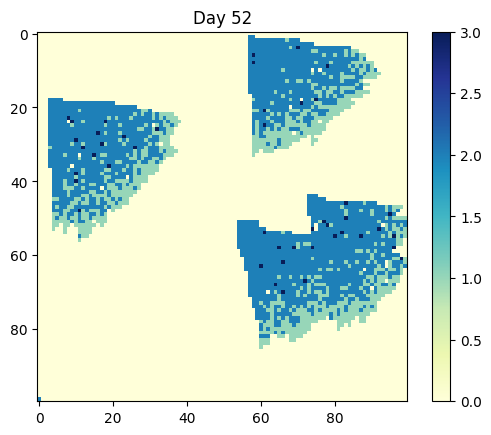

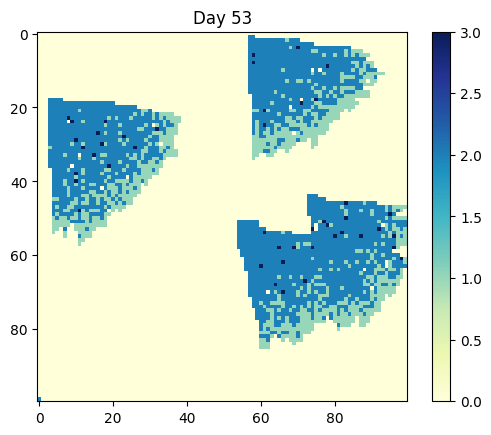

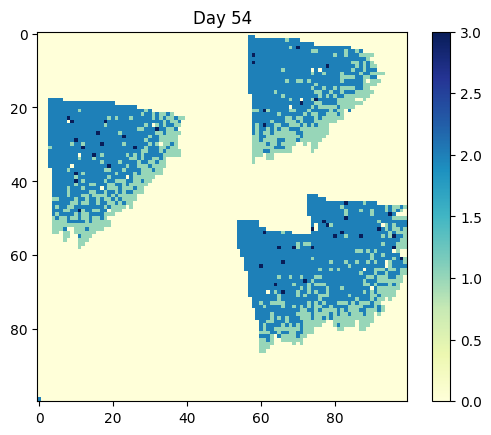

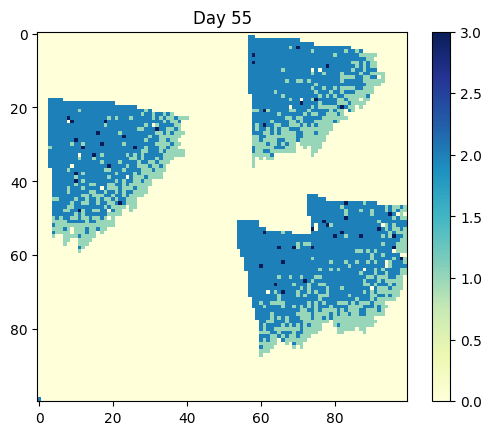

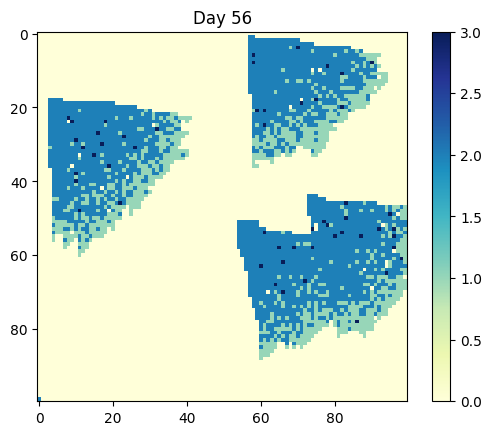

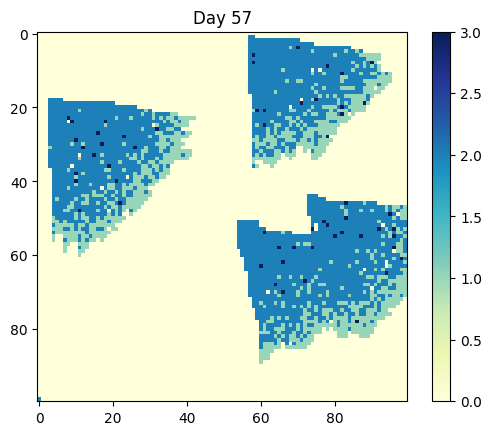

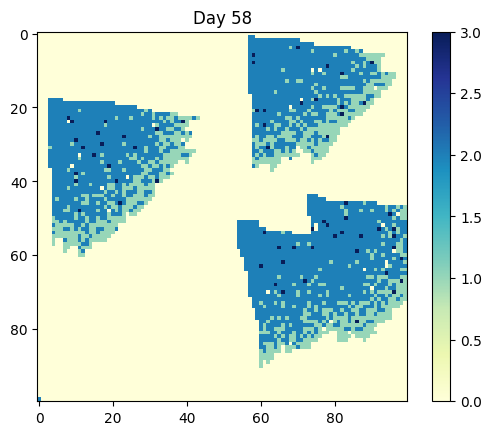

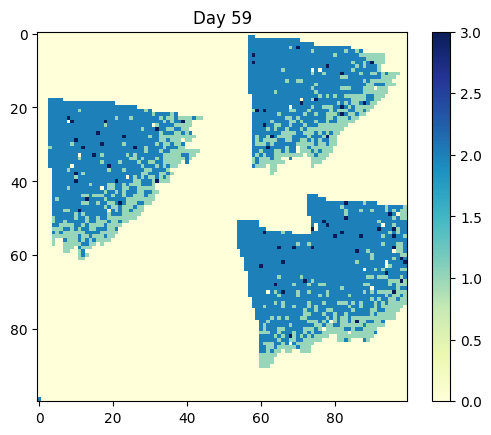

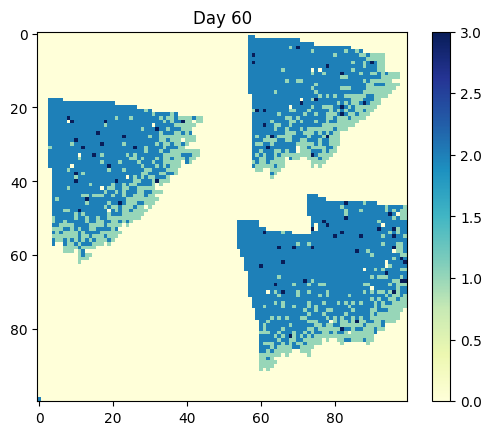

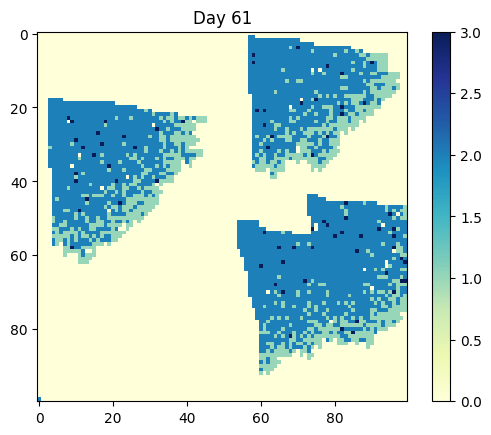

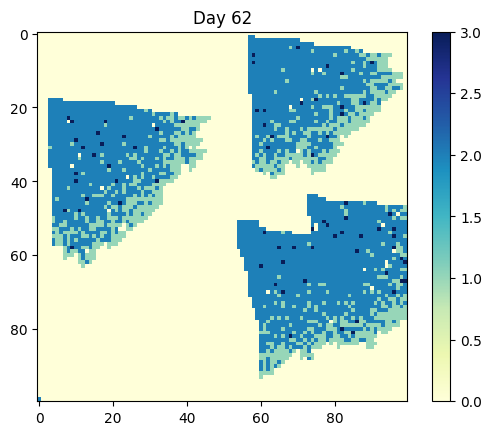

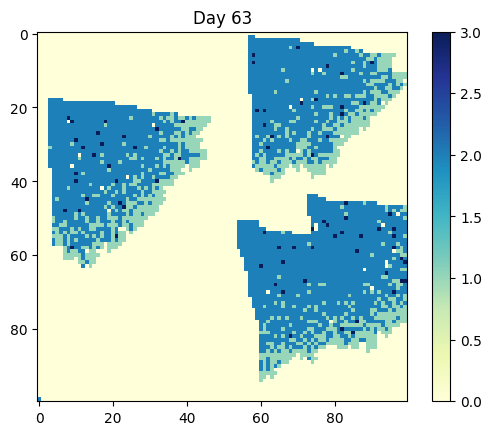

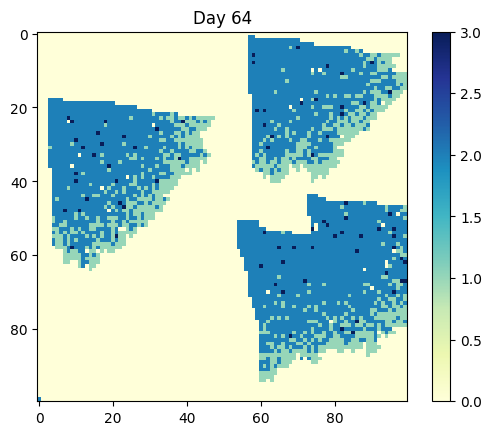

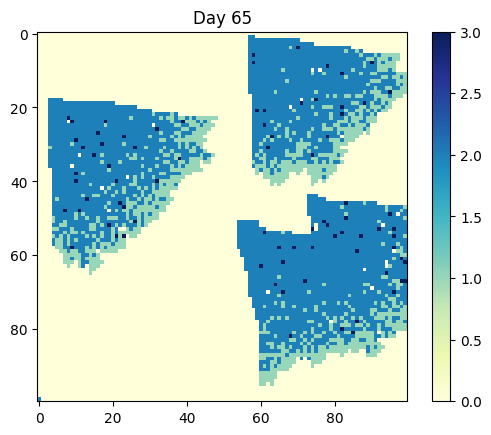

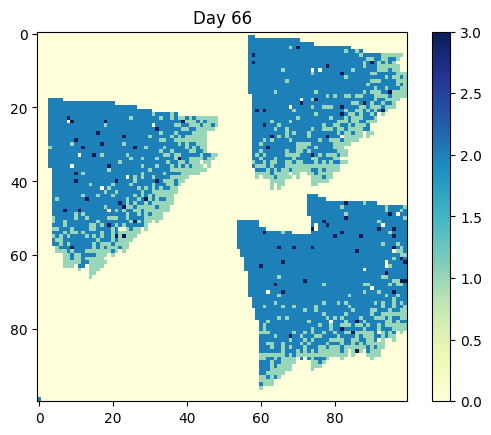

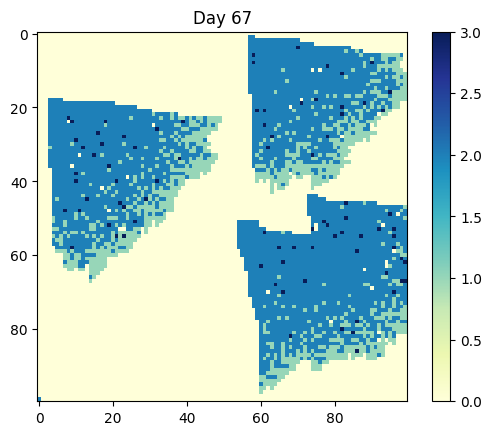

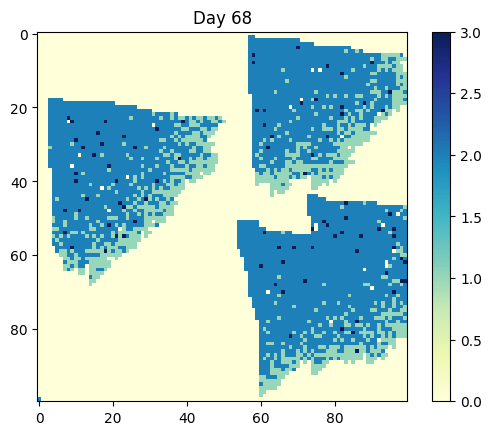

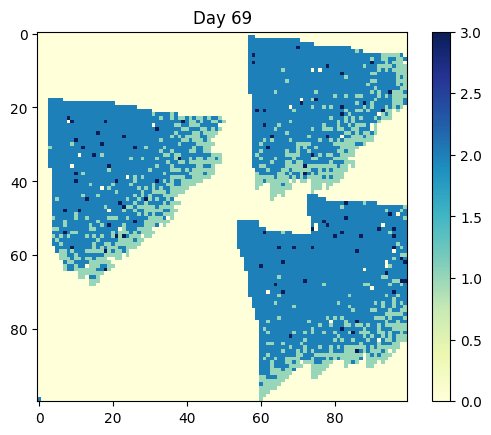

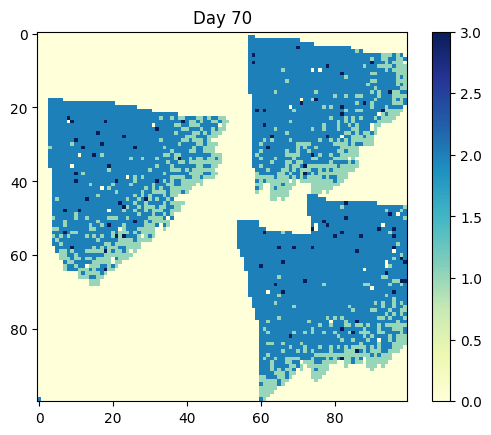

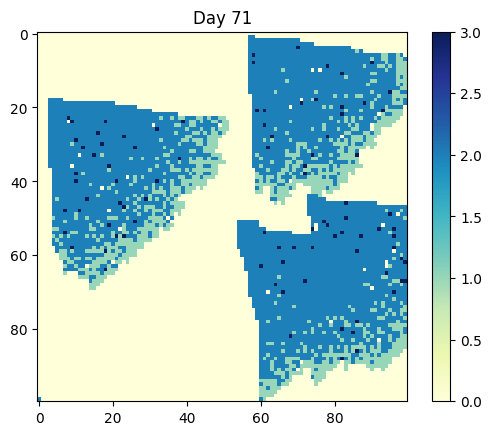

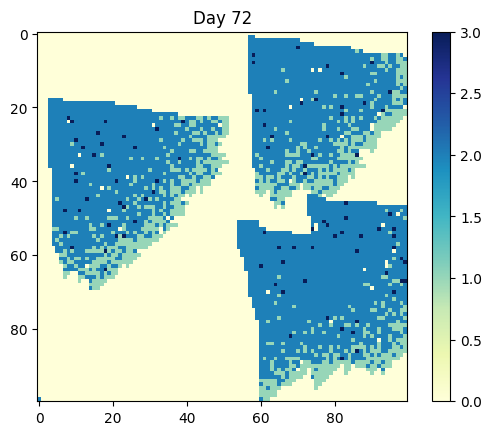

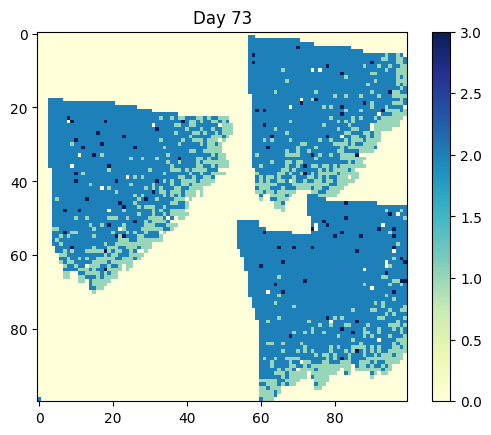

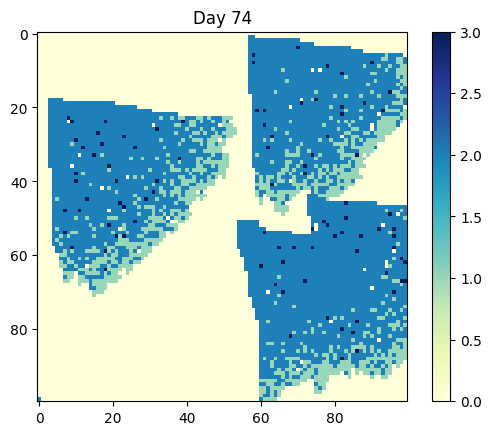

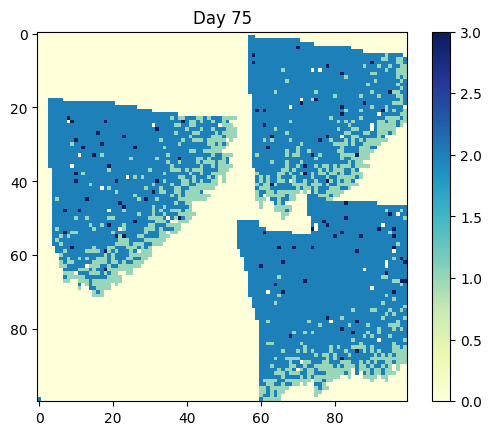

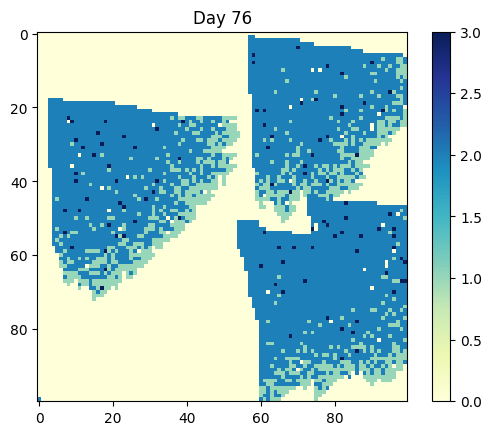

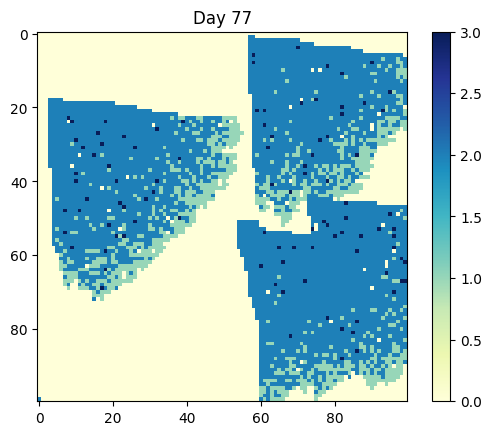

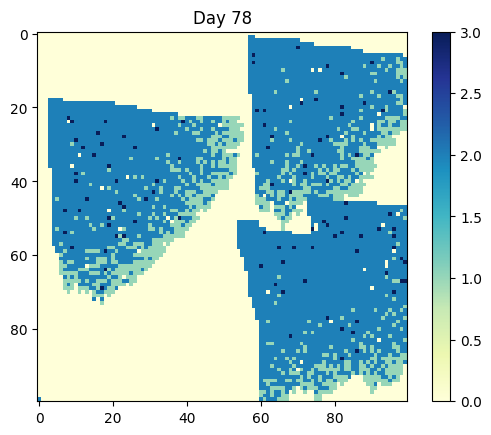

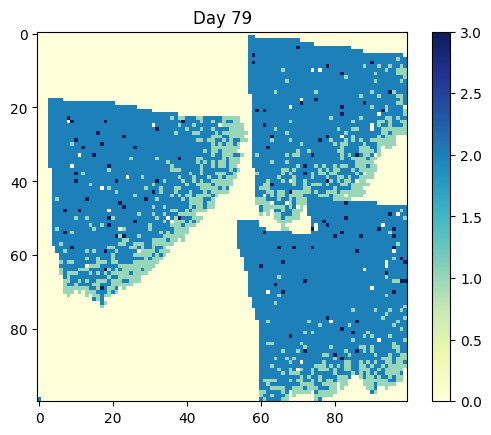

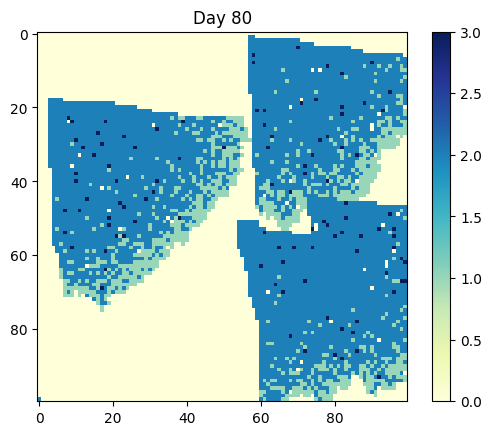

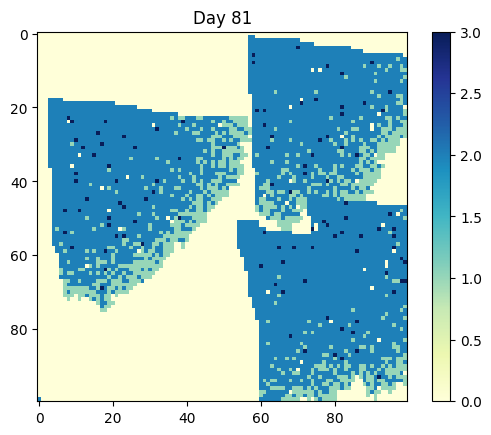

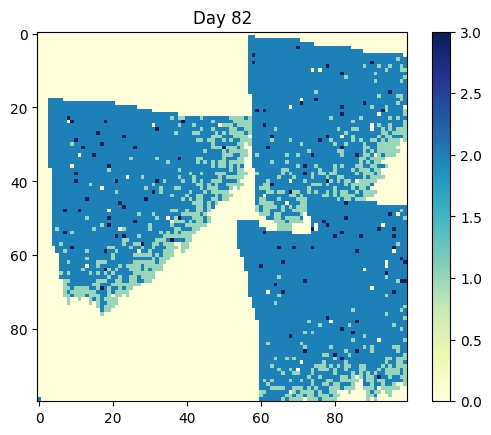

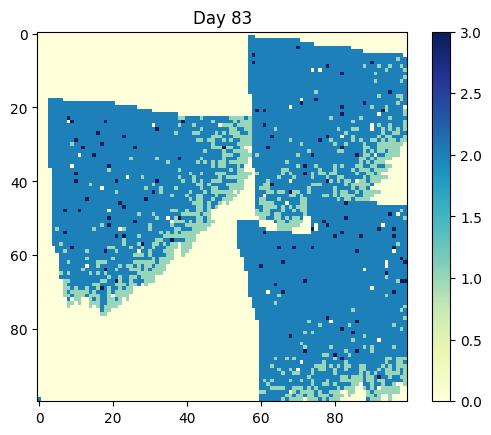

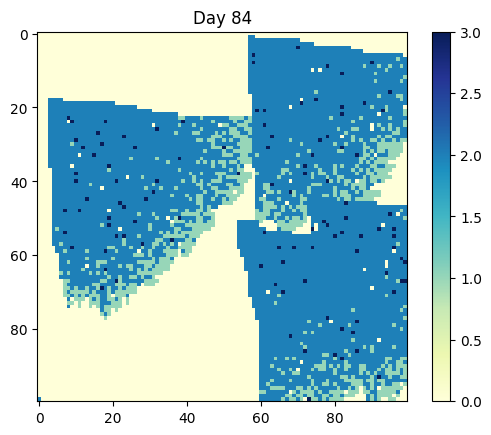

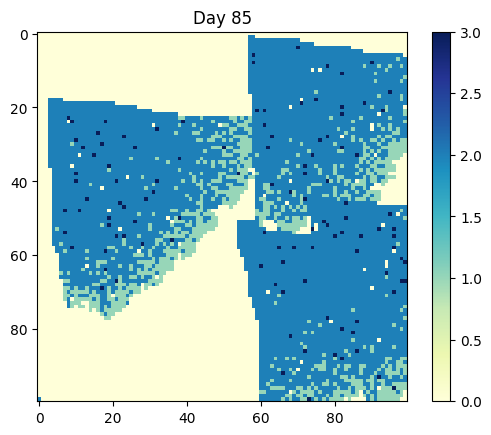

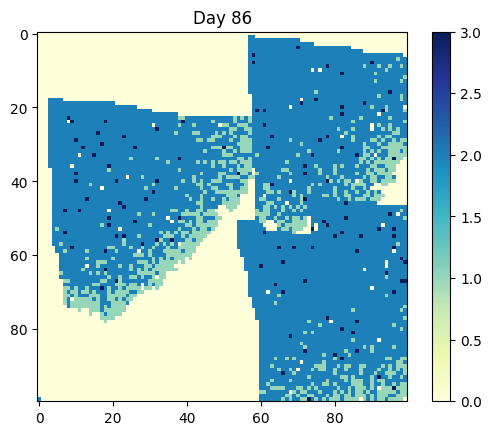

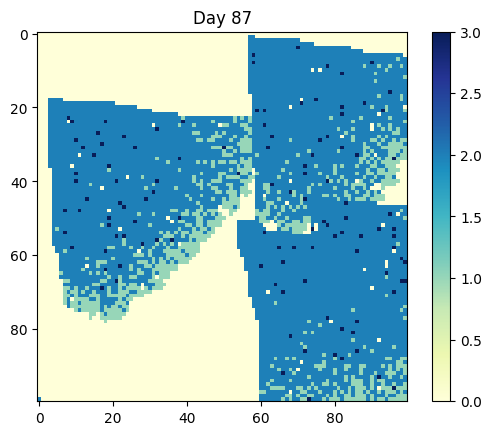

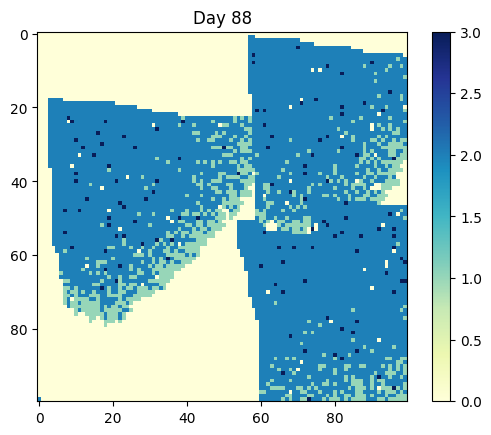

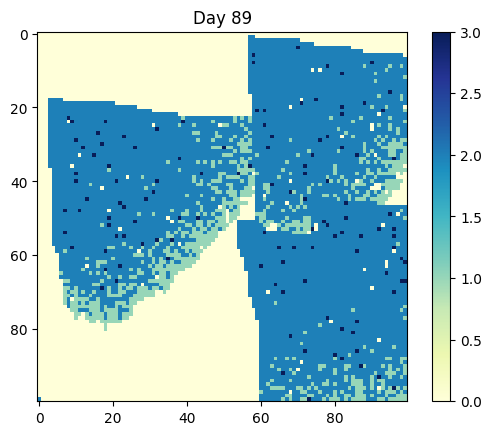

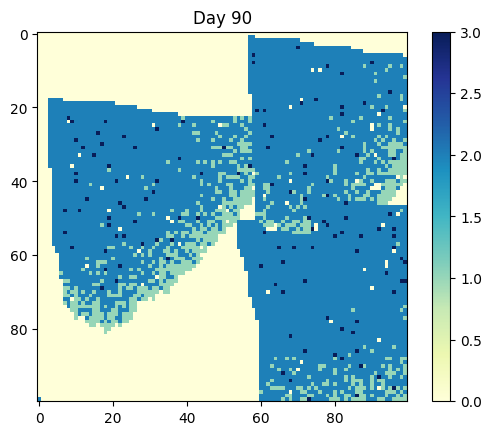

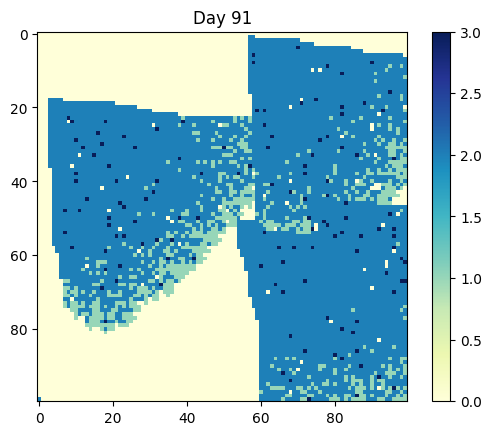

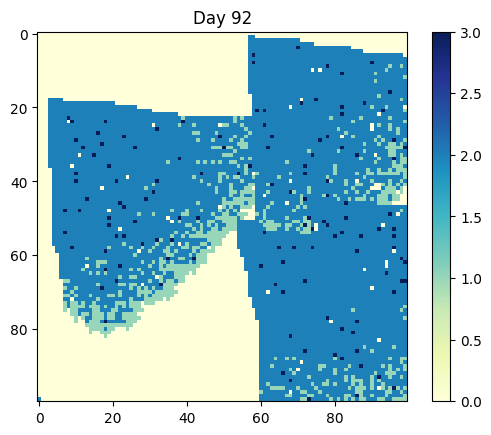

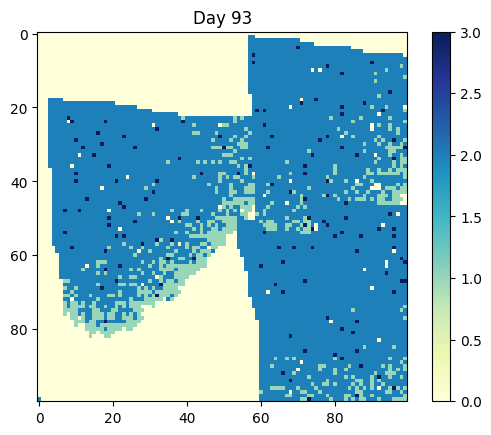

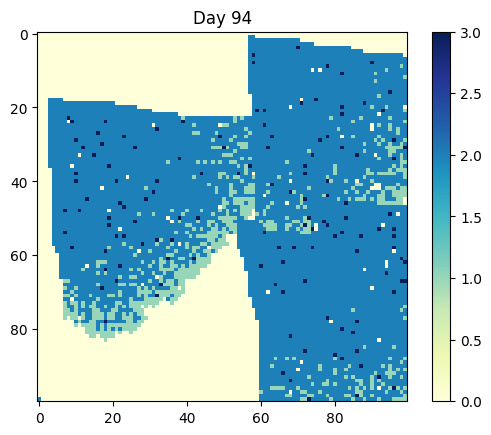

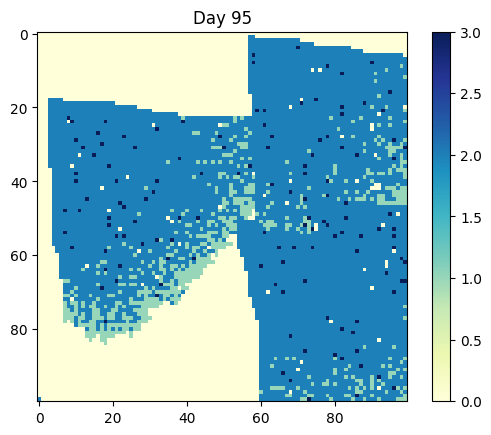

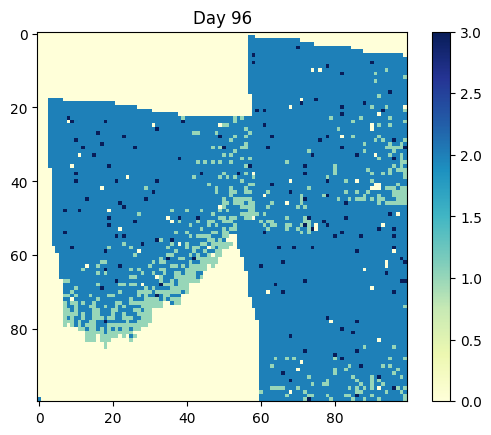

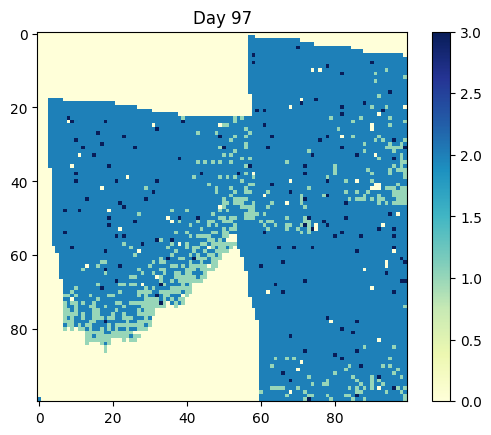

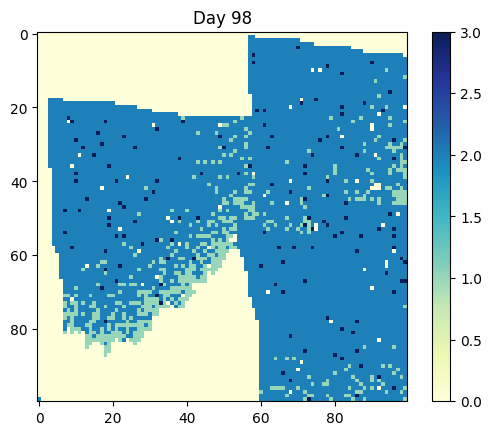

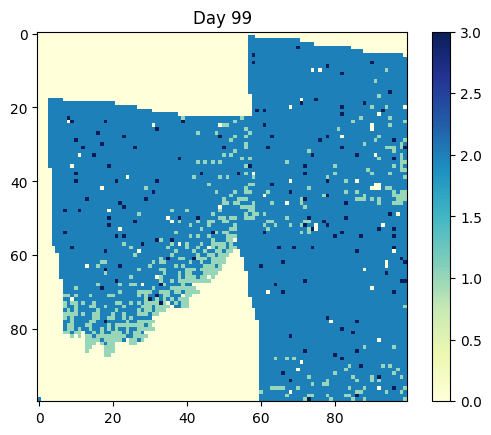

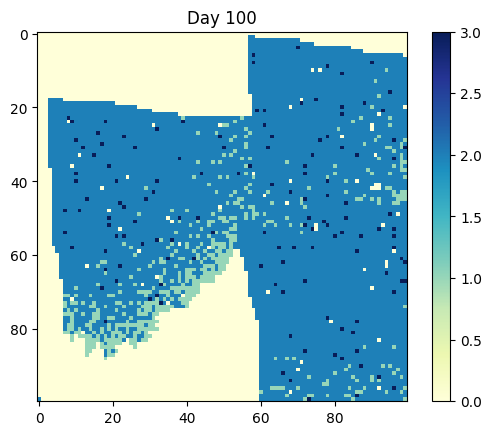

In [93]:
def display_grid(grid, day):
    plt.imshow(grid, cmap='YlGnBu')
    plt.colorbar()
    plt.title(f'Day {day}')
    plt.show()

def main():
    grid = initialize_grid()
    grid = randomly_infect(grid)
    display_grid(grid, 0)

    for day in range(1, 101):

        grid = update_grid(grid)

        display_grid(grid, day)

main()